In [1]:
import scipy.io as sio
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from fieldmodel import GeodesicFieldModel as GFM
from fieldmodel import utilities as util
from fieldmodel import plotting

In [9]:
from importlib import reload

In [182]:
reload(plotting)
reload(util)
reload(GFM)

<module 'fieldmodel.GeodesicFieldModel' from '/Users/kristianeschenburg/Documents/Code/fieldmodel/fieldmodel/GeodesicFieldModel.py'>

In [2]:
sx_file = '../data/source.X.mat'
sx = sio.loadmat(sx_file)['x'].squeeze()

sy_file = '../data/source.Y.mat'
sy = sio.loadmat(sy_file)['y'].squeeze()

tx_file = '../data/target.X.mat'
tx = sio.loadmat(tx_file)['x'].squeeze()

ty_file = '../data/target.Y.mat'
ty = sio.loadmat(ty_file)['y'].squeeze()

dist_file = '../data/distance.mat'
dist = sio.loadmat(dist_file)['apsp']

field_file = '../data/scalar_field.mat'
field = sio.loadmat(field_file)['field'].squeeze()

In [183]:
G = GFM.FieldModel(amplitude=False, 
                   metric='pearson', 
                   peak_size=12, 
                   hood_size=12)

G.fit(data=field, distances=dist, x=tx, y=ty)

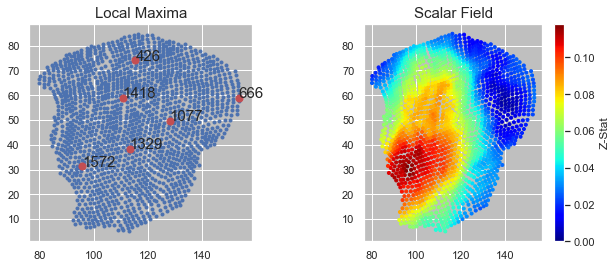

In [184]:
peaks = util.find_peaks(dist=dist, 
                        n_size=G.hood_size, 
                        sfield=field)

nhood = util.peak_neighborhood(apsp=dist, 
                               n_size=G.hood_size, 
                               peaks=peaks)

F = plotting.plot_peaks(peaks=peaks, 
                        sfield=field, 
                        x=tx, y=ty, 
                        field_kwargs={'label': 'Z-Stat'})

plt.savefig('/Users/kristianeschenburg/Documents/Code/fieldmodel/demos/peaks.png', 
           bbox_inches='tight')

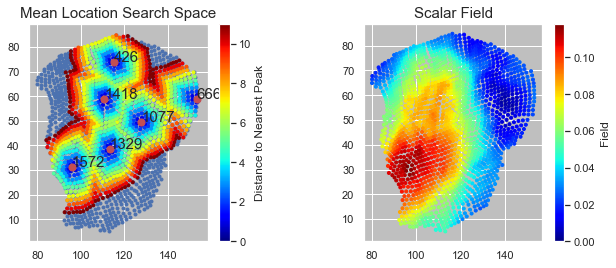

In [185]:
F = plotting.plot_searchspace(dist=dist,
                              peaks=peaks,
                              nhood=nhood,
                              sfield=field,
                              x=tx, y=ty)

plt.savefig('/Users/kristianeschenburg/Documents/Code/fieldmodel/demos/searchspace.png', 
           bbox_inches='tight')

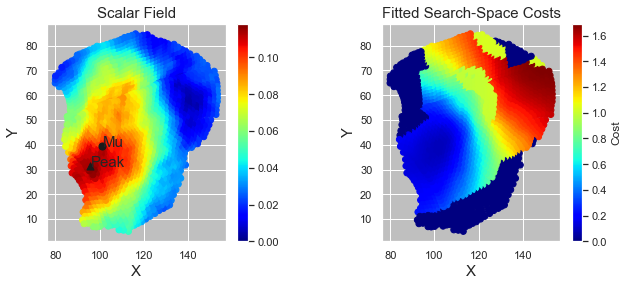

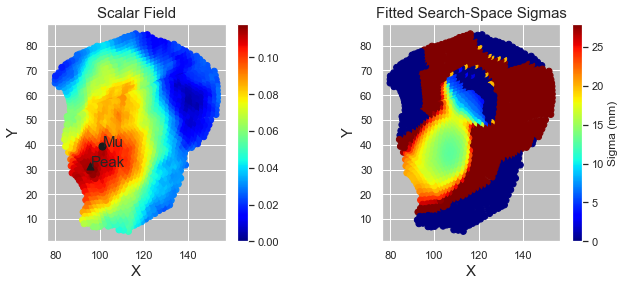

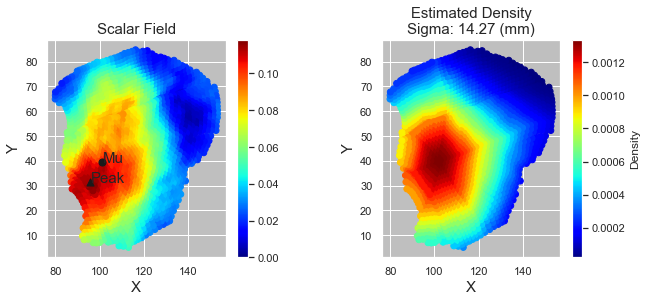

In [186]:
for f in ['cost', 'sigma', 'pdf']:
    F = G.plot(field=f)
    plt.savefig('/Users/kristianeschenburg/Documents/Code/fieldmodel/demos/%s.png' % (f), 
               bbox_inches='tight')
    plt.show()
    plt.close()